# Project: Investigate a Dataset (TMDb_Movies Dataset)

# RESEARCH QUESTION:


# #What makes a movie successful?

<h2>Table of Contents</h2>
<ul>
    <li>Introduction</li>
    <li>Data Wrangling</li>
    <li>Data Exploration</li>
    <li>Conclusions</li>
</ul>


<h1>Introduction</h1>

To complete my Data Analysis project I am using TMDb movies dataset.
I will explore various variable of this dataset to answer my research question: What makes a movie successful? Namely: Vote Average, Profits, Budget, Cast members, and Directors.
This dataset consists of 10866 rows and 21 columns. 

<h2>Questions to explore</h2>
<ul>
    <li>which movies had the highest and lowest profit?</li>
    <li>Which movies had the highest and lowest budget?</li>
    <li>How many movies made a profit and how many made a loss?</li>
    <li>Which year saw the highest profits?</li>
    <li>Which year saw the lowest profits?</li>
    <li>Is vote average correlated to profits?</li>
    <li>Is there a correlation between budget and profit?</li>
    <li>Do Genres, Directors or Cast members have an impact on profitability</li>
</ul>


# Data wrangling

# # Gather and assess data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
df = pd.read_csv(open('/home/khrystyne/tmdb-movies.csv'), encoding='utf-8', engine='python')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [2]:
df.shape

(10866, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.isnull().sum().sum()

13434

In [5]:
df.duplicated().sum()

1

In [6]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

# Cleaning The Data

-Some of the columns in this dataframe need to be dropped, as they are not needed or useful in answering the question that have been posed. 

-This data set is pretty straight forward and relatively well structured. Therefore not much needs to be done to clean the data in the form of modifying, removing or replacing data. However, there is dupicated data, missing values and unnessacery columns.

<h2>Steps</h2>
<ul>
    <li>Drop columns</li>
    <li>Drop Duplicates</li>
    <li>Fill in Missing Values</li>
<ul>


In [7]:
#drop columns that are not needed for analysis
df.drop(df.columns[[0,1, 7, 9, 10, 11, 12, 14, 15]], axis = 1, inplace = True)

In [8]:
#make sure changes are in place 
df.head(1)

,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


In [9]:
df.shape

(10866, 12)

In [10]:
#drop duplicated data
df.drop_duplicates(inplace=True)
#confirm correction 
df.duplicated().sum()

0

In [11]:
#There are quite a large number of missing values(13434). Instead of dropping these missing values,
#I will fill in the missing data with mean()
df.fillna(df.mean(), inplace=True)

In [12]:
#check if there are still missing values.
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [ ]:
#fillna did not fill in missing values for cast and genres because those are string values 
#and not integers. Using mean to fill in missing values only works on ints and floats

In [13]:
#Since the cast, director and genre columns are objects, I will fill in the missing data with an
# empty string
df.cast.fillna(' ', inplace=True)
df.genres.fillna(' ', inplace=True)
df.director.fillna(' ', inplace=True)

In [14]:
#Now we can see that there are no missing values.(However, I suspect that these missing objects 
#will not have any significant affect on the data and the analysis thereof. This step is solely
#for the purpose of making the data look better.)
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [15]:
df.shape

(10865, 12)

Now we have a dataframe of 10865 rows and 12 columns. Now, we have to identify the movies that have a budget or revenue of 0 and then drop those movies, because we only want rows with valid values for our analysis.

In [20]:
budget_zero = df[df.budget == 0]
revenue_zero = df[df.revenue == 0]
#budget_zero, revenue_zero

In [22]:
df.drop(budget_zero.index, inplace=True)
df.drop(revenue_zero.index, axis=0, inplace=True)

In [23]:
df.shape

(3854, 12)

I will work out the profit that each movie makes and add this as a new column. This is done because that is a variable we might want to explore.

In [24]:
df['profit'] = df.revenue - df.budget

In [25]:
df = df[['profit'] + df.columns[:-1].tolist()]

In [26]:
df.head(1)

,profit,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,1363528810,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


In [27]:
df.sort_values('profit', ascending=False)

,profit,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,2544505847,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009,2.408869e+08,2.827124e+09
3,1868178225,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,1645034188,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Drama|Romance|Thriller,4654,7.3,1997,2.716921e+08,2.506406e+09
0,1363528810,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
4,1316249360,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
4361,1299557910,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Science Fiction|Action|Adventure,8903,7.3,2012,2.089437e+08,1.443191e+09
3374,1202817822,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,Adventure|Family|Fantasy,3750,7.7,2011,1.211748e+08,1.287184e+09
14,1125035767,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,Action|Adventure|Science Fiction,4304,7.4,2015,2.575999e+08,1.292632e+09
5422,1124219009,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,Animation|Adventure|Family,3369,7.5,2013,1.404050e+08,1.192711e+09
8094,1084279658,1.136610,22000000,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,Crime|Drama|Mystery|Thriller|Action,201,5.6,1995,3.148127e+07,1.583050e+09


Now we can see which of the movies made the highest profits

# Data Exploration

# #Drawing Conclusions

Now that the data has been cleaned, we can explore the data and draw conclusions


I want to see which movies had the highest and lowest profit

In [28]:
df[df['profit'] == df['profit'].min()]

,profit,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,-413912431,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Adventure|Fantasy|Action|Western|Thriller,74,6.4,2010,425000000.0,11087569.0


The movie 'The Warriors Way' made a loss of 413912431, but we can also see that it wasnt very popular

In [29]:
df[df['profit'] == df['profit'].max()]

,profit,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,2544505847,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009,2.408869e+08,2.827124e+09


The movie Avatar made the highest profit among all the movies, with a profit of 2544505847, also we can see that this movie was quite popular.

Which movies had the highest and lowest budget?

In [30]:
df[df['budget'] == df['budget'].max()]

,profit,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,-413912431,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Adventure|Fantasy|Action|Western|Thriller,74,6.4,2010,425000000.0,11087569.0


It seems that while 'The Warriors Way' had the greatest loss, it also had the highest budget

In [31]:
df[df['budget'] == df['budget'].min()]

,profit,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2618,99,0.090186,1,100,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,Comedy|Romance,14,4.8,1999,1.309053,130.905285
3581,1377,0.520430,1,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,Comedy|Romance,55,5.3,2011,0.969398,1335.830503


Lost and Found had the lowest budget

We can take a look at these findings in a table.

In [38]:
#defining a function
def data_calc(column):
    #highest 
    high = df[column].idxmax()
    high_calc = pd.DataFrame(df.loc[high])
    
    #lowest
    low= df[column].idxmin()
    low_calc=pd.DataFrame(df.loc[low])
    
    #putting the data into a table
    table = pd.concat([high_calc, low_calc], axis=1)
    
    return table

#calling the function
data_calc('profit')

,1386,2244
profit,2544505847,-413912431
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
vote_count,8458,74
vote_average,7.1,6.4


In [39]:
#we'll call the same function to see the budget findings in a table
data_calc('budget')

,2244,2618
profit,-413912431,99
popularity,0.25054,0.090186
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
vote_count,74,14
vote_average,6.4,4.8


In [40]:
#Lets also take a look at the highest and lowest revenues
data_calc('revenue')

,1386,5067
profit,2544505847,-5999998
popularity,9.43277,0.462609
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
vote_count,8458,46
vote_average,7.1,6.4


In [61]:
#Create a dataframe that contains the movies that made a profit
profit_data = df[df['profit'] > 0]
profit_data.index = range(len(profit_data))
#make sure changes are applied
profit_data.head()
#profit_data['profit'].plot(kind='bar')

,profit,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,1363528810,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,228436354,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,185238201,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,1868178225,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,1316249360,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


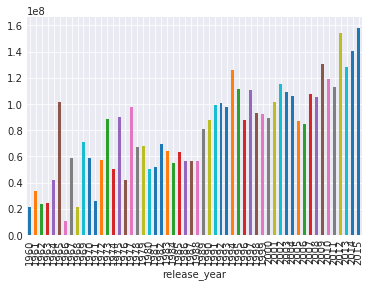

In [63]:
#Movies that made a profit
profit_data.groupby('release_year').profit.mean().plot(kind='bar');

In [47]:
#Create a dataframe that contains the movies that made a loss
loss_data = df[df['profit'] <= 0]
loss_data.index = range(len(loss_data))
#make sure changes are applied
loss_data.head()

,profit,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,-29581440,2.575711,60000000,30418560,Mortdecai,Johnny Depp|Gwyneth Paltrow|Ewan McGregor|Paul...,David Koepp,Comedy|Adventure,696,5.3,2015,5.519998e+07,2.798506e+07
1,-52247060,2.550747,70000000,17752940,Blackhat,Chris Hemsworth|Leehom Wang|Tang Wei|Viola Dav...,Michael Mann,Mystery|Crime|Action|Thriller|Drama,584,5.0,2015,6.439997e+07,1.633270e+07
2,-6179242,2.345821,100000000,93820758,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,Thriller|Drama|Adventure|Action|History,805,6.4,2015,9.199996e+07,8.631506e+07
3,-21611680,2.234573,150000000,128388320,Pan,Levi Miller|Garrett Hedlund|Hugh Jackman|Roone...,Joe Wright,Adventure|Family|Fantasy,586,5.9,2015,1.379999e+08,1.181172e+08
4,-9136685,2.026651,11000000,1863315,Tracers,Marie Avgeropoulos|Taylor Lautner|Adam Rayner|...,Daniel Benmayor,Action|Crime|Drama,326,5.9,2015,1.012000e+07,1.714249e+06


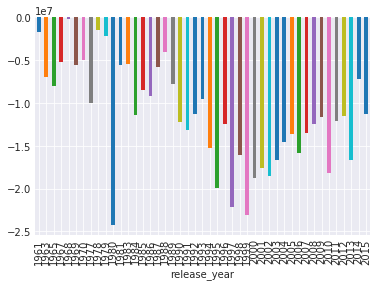

In [67]:
#Movies that made a loss
loss_data.groupby('release_year').profit.mean().plot(kind='bar');

In [42]:
p = len(profit_data)
p

2778

This shows that there are 2778 movies that made a profit

In [44]:
loss = len(df) - len(profit_data) 
loss

1076

And there are 1076 movies that made a loss

Lets take a look at profit and loss by year with a line graph

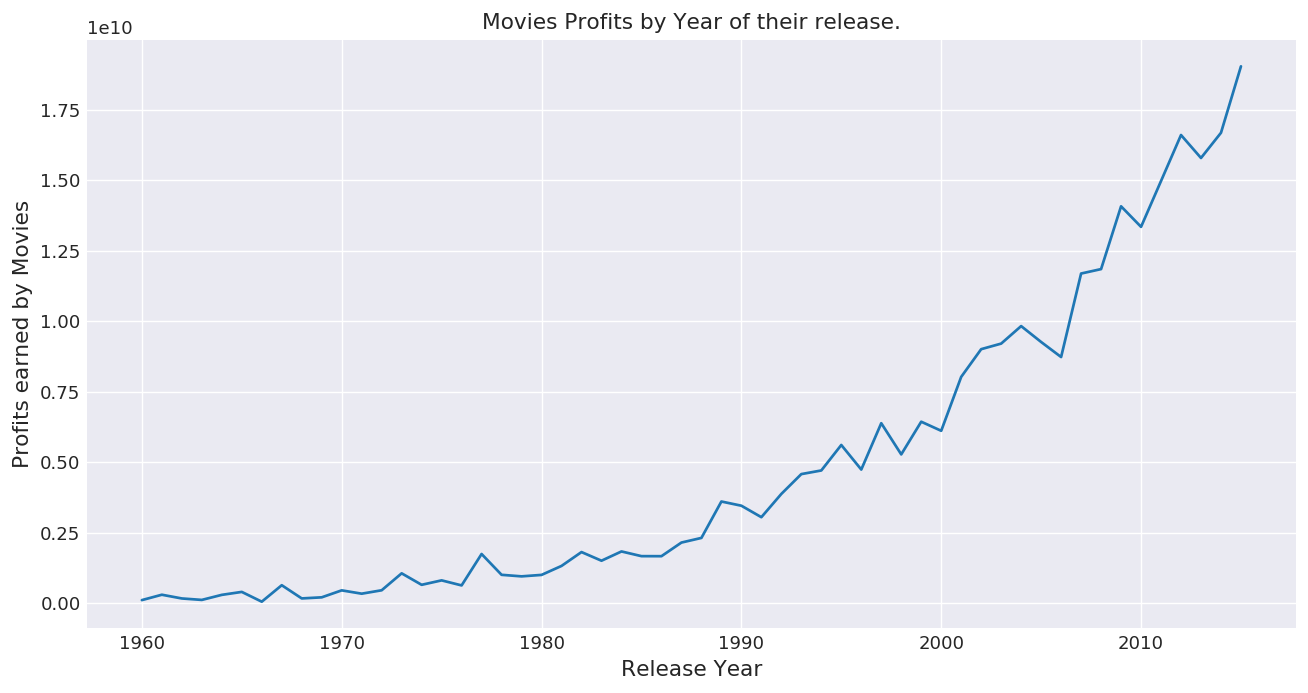

In [66]:
year_prof = df.groupby('release_year')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#x-axis
plt.xlabel('Release Year', fontsize = 12)
#y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title
plt.title('Movies Profits by Year of their release.')

#plotting the graph
plt.plot(year_prof)

#display the line plot
plt.show()


We can conclude with our graphs that the year 2015 saw the highest profits and the year
1968 saw the least profits

IS VOTE AVERAGE CORRELATED TO PROFITS?

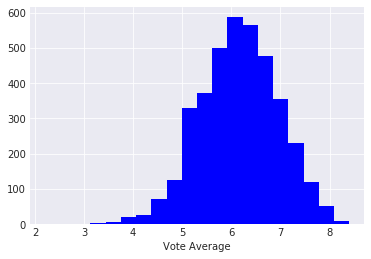

In [70]:
plt.hist(df.vote_average, bins=20, color='blue')
plt.xlabel("Vote Average")
plt.show()

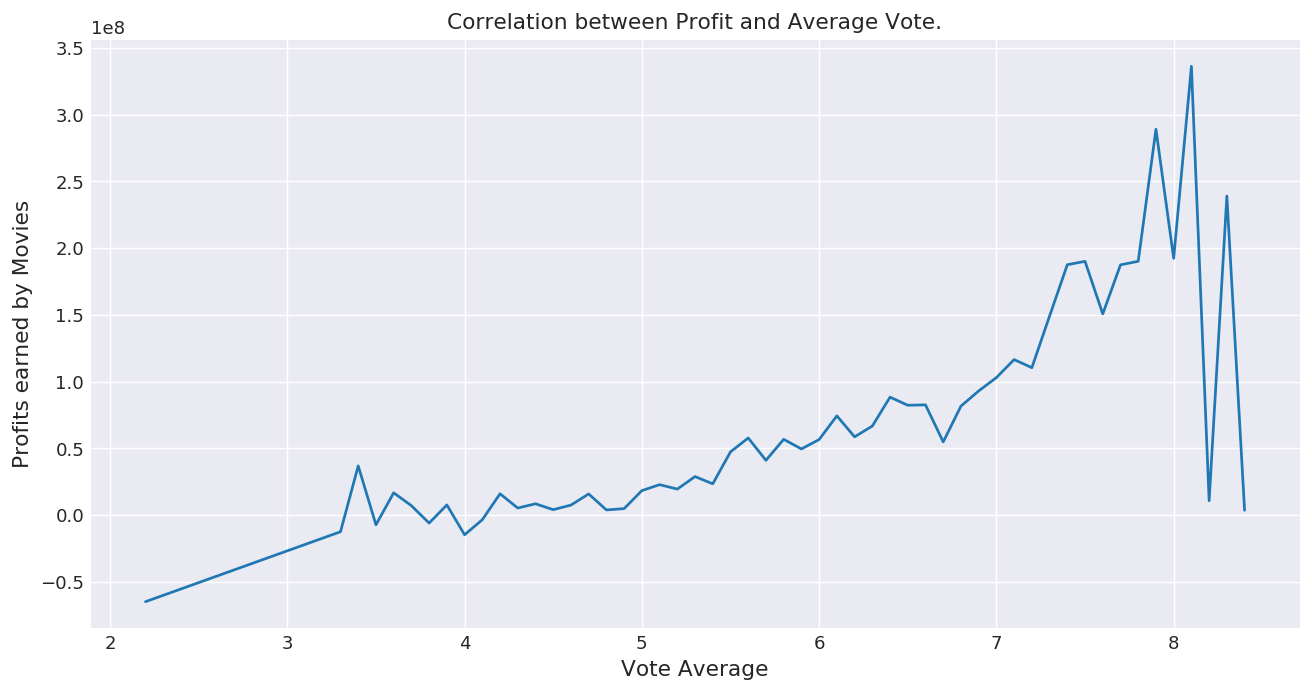

In [127]:
vote_prof = df.groupby('vote_average')['profit'].mean()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#x-axis
plt.xlabel('Vote Average', fontsize = 12)
#y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title
plt.title('Correlation between Profit and Average Vote.')

#plotting the graph
plt.plot(vote_prof)

#display the line plot
plt.show()

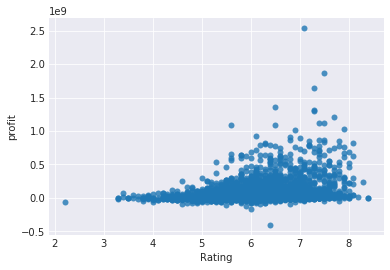

In [171]:
plt.scatter(df.vote_average, df.profit, lw=0,alpha=0.8)
plt.xlabel('Rating')
plt.ylabel('profit')
plt.show()

Genarally, the line graph and scattor plot seem to indicate that the higher the vote the higher
the profit. However, there seem to be some irregularities, because at the end of the
graph there seems to be a dip in profit even though the vote average is above 8.

We can get a better understanding of the relationship between variables using the correlation coefficient.

Lets take a closer look at this relationship with correlation coefficient. There seems to be some linnear trend, however the trend is not very clear. The points are somewhat scattered, showing a linear relationship is present, but not a very strong one

In [116]:
#work our correlation coefficient.
df['vote_average'].corr(df['profit'])

0.25943499037670165

There is a weak positive correlation between votes and profit

Is there a correlation between budget and profit?

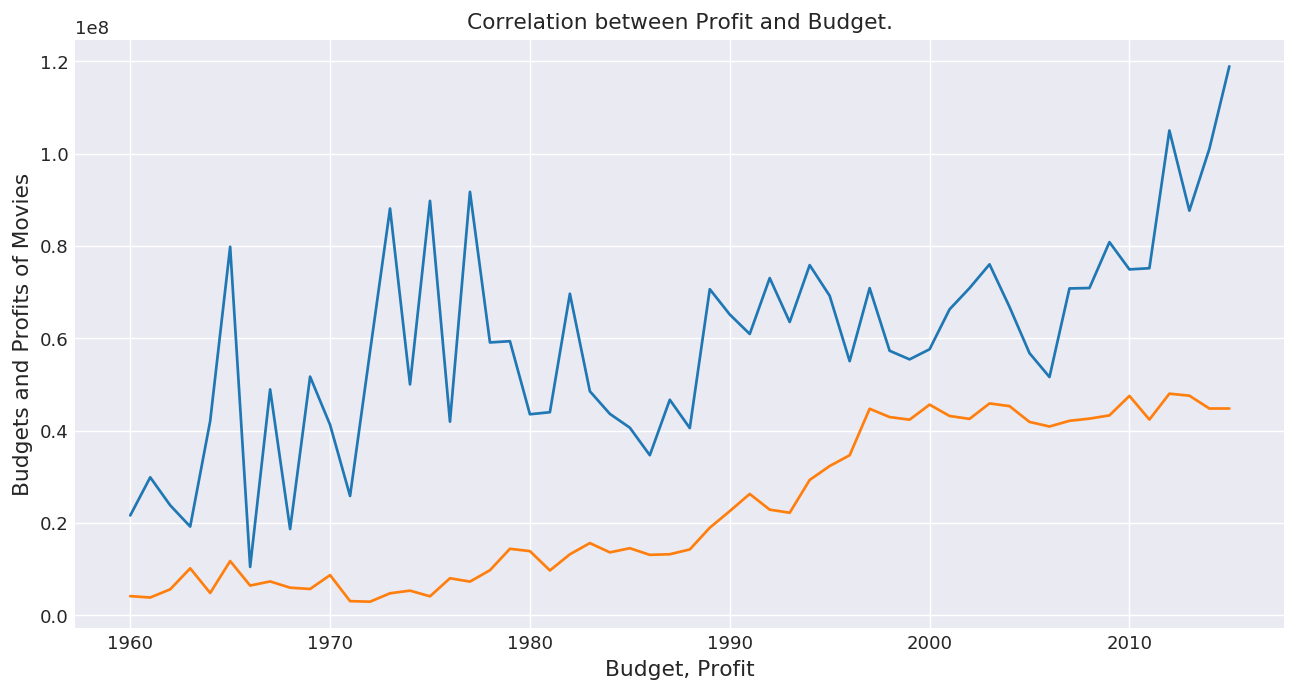

In [200]:
budget_prof = df.groupby('release_year')['profit', 'budget'].mean()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#x-axis
plt.xlabel('Budget, Profit', fontsize = 12)
#y-axis
plt.ylabel('Budgets and Profits of Movies', fontsize = 12)
#title
plt.title('Correlation between Profit and Budget.')

#plotting the graph
plt.plot(budget_prof)

#display the line plot

plt.show()

Top 20 most profitable movies

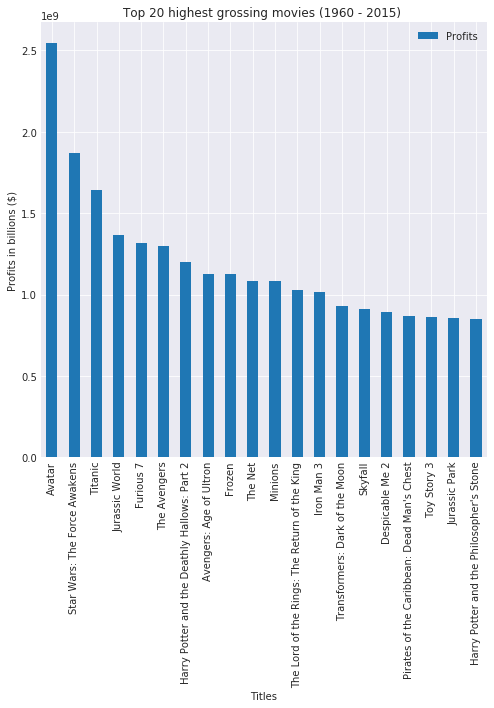

In [129]:
prof_high = df['profit'].sort_values(ascending=False)[:20]

high_profits=pd.DataFrame()
titles = []
profits = []
for i in prof_high.index:
    titles.append(df.loc[i,'original_title'])
    profits.append(prof_high.loc[i])
high_profits['Titles']=titles
high_profits['Profits']=profits
high_profits.set_index('Titles',inplace=True)
high_profits.plot(kind ='bar',figsize=(8,8))
plt.title('Top 20 highest grossing movies (1960 - 2015) ');
plt.ylabel('Profits in billions ($)');

Top 20 movies with the highest Budgets

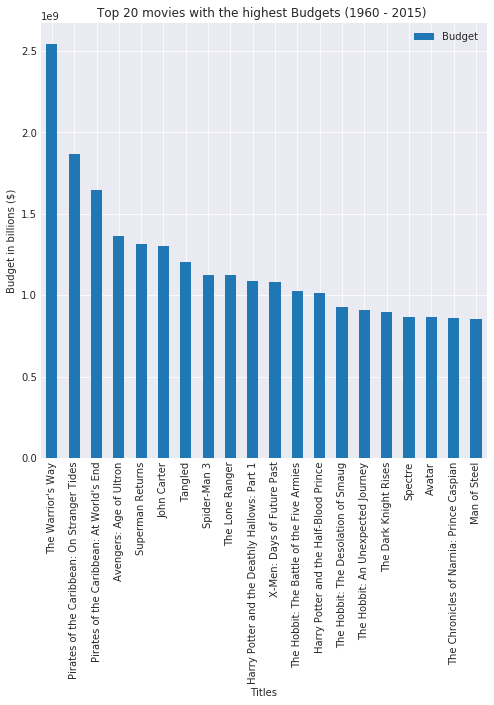

In [130]:
budget_high = df['budget'].sort_values(ascending=False)[:20]

high_budget=pd.DataFrame()
titles = []
budgets = []
for i in budget_high.index:
    titles.append(df.loc[i,'original_title'])
    budgets.append(budget_high.loc[i])
high_budget['Titles']=titles
high_budget['Budget']=profits
high_budget.set_index('Titles',inplace=True)
high_budget.plot(kind ='bar',figsize=(8,8))
plt.title('Top 20 movies with the highest Budgets (1960 - 2015) ');
plt.ylabel('Budget in billions ($)');

As evidence in the bar graphs show, a high budget does not necesseraly equate to a high profit.
This is evident if we look at 'The Warriors Way'. This movie had the hifgest budget of all, but
made the least profit. Also, 'Pirates of the Caribbean: On Stranger Tides' had the second largest
budget, however, it was not one of the top 20 grossing movies. 

It is important to note, if we look at the line grapg, that there is a trend between budget and
profit. Over the years as more money is spent on the production of a movie, the likelyhood
of that movie making more profit is higher.

Lets take a look at the variables across scatter plots and ,also, look at the correlation 
coefficient.

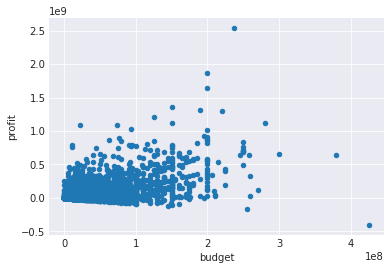

In [170]:
df.plot(x = 'budget', y = 'profit', kind = 'scatter')

In [133]:
df['budget'].corr(df['profit'])

0.5268176539924018

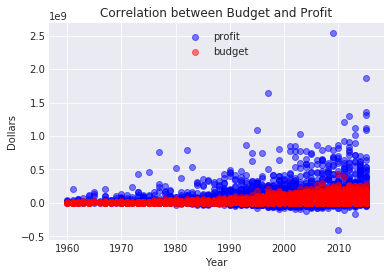

In [177]:
plt.scatter(df['release_year'], df['profit'], color='b', label='profit', alpha=0.5)
plt.scatter(df['release_year'], df['budget'], color='r', label='budget', alpha=0.5)
plt.title('Correlation between Budget and Profit')
plt.xlabel("Year")
plt.ylabel("Dollars")
plt.legend(loc='upper center')  
#plt.grid(True)
plt.show()

There is a moderate positive relationship: Pearson r = 0.526

Some points are close to the line but other points are far from it, which indicates only
a moderate linear relationship between the variables. This means that as one variable moves 
upwards so does the other variable. 

Lastly, lets take a look at the most popular directors, genres and cast members and if these variables impacts profits at all.

In [178]:
#I will create a function for the next set of questions to make the code cleaner and more
#conscise
def data_extract(col_name):
    df_data = profit_data[col_name].str.cat(sep = '|')
    data = pd.Series(df_data.split('|'))
    count = data.value_counts(ascending = False)
    return count


In [179]:
#which genres were the most succesful
genre_count = data_extract('genres')
genre_count.head()
#table=pd.Series(genre_count).value_counts(ascending=True)#[-10:]
#graph = table.plot.barh()
#graph.set(title = "most popular genres",xlabel = "Number of movies.")
#print (table)

Drama        1172
Comedy       1010
Thriller      839
Action        788
Adventure     575
dtype: int64

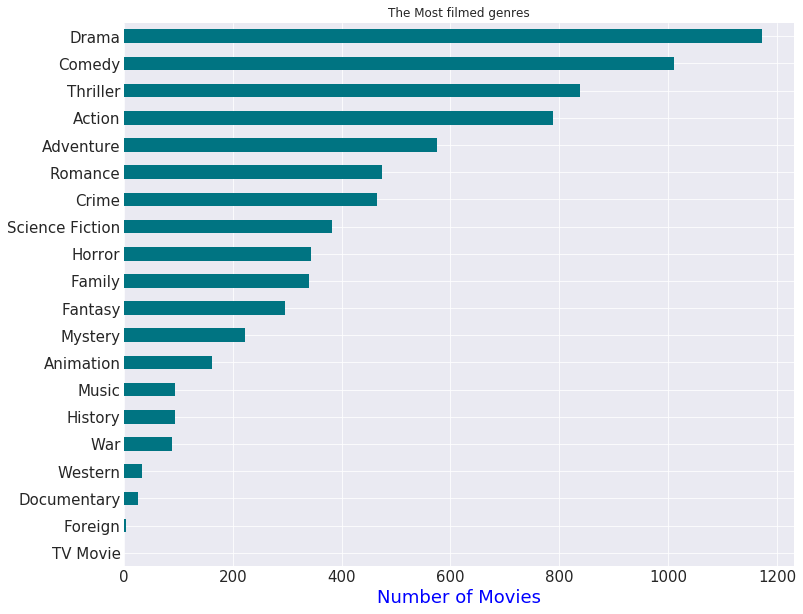

In [180]:
genre_count.sort_values(ascending = True, inplace = True)

# plot
ax = genre_count.plot.barh(color = '#007482', fontsize = 15)

# title
ax.set(title = 'The Most filmed genres')

#x-label
ax.set_xlabel('Number of Movies', color = 'b', fontsize = '18')

# figure sizes(width, height)
ax.figure.set_size_inches(12, 10)

#printing the plot
plt.show()


Most popular cast members.
Which Cast members contribute to a profitible movie?


In [190]:
#Call on the previos function
#which cast members appeared in the most movies?
cast_count = data_extract('cast')
cast_count.head()


Robert De Niro    38
Tom Hanks         33
Bruce Willis      33
Tom Cruise        31
Brad Pitt         30
dtype: int64

Lets look at a graph to explore this more closely and see who the most popular
cast members are overall

[Text(0.5,0,'Number of time casted.'),
 Text(0.5,1,'List of actors who appeared in the most movies')]

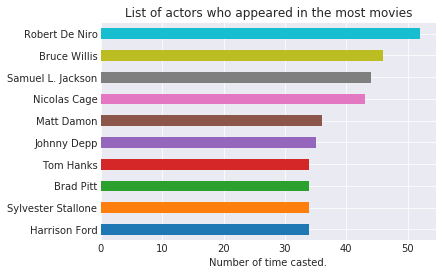

In [196]:
actor = df['cast'].str.cat(sep='|').split('|')

table=pd.Series(actor).value_counts(ascending=True)[-10:]
graph = table.plot.barh()
graph.set(title = 'List of actors who appeared in the most movies',xlabel = 'Number of time casted.')

The director
Which directors contribute to a profitible movie?

In [193]:
director_count = data_extract('director')
director_count.head()

Steven Spielberg    27
Clint Eastwood      21
Ridley Scott        16
Tim Burton          16
Robert Zemeckis     15
dtype: int64

Lets look at a graph to explore this more closely and see who the most popular
directors are overall

[Text(0.5,0,'Number of movies directed.'),
 Text(0.5,1,'List of most popular directors')]

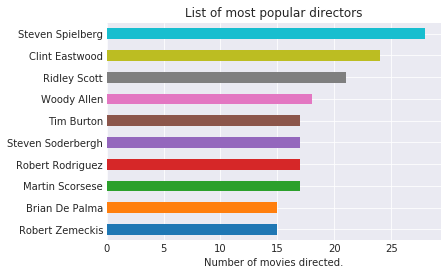

In [194]:
directors = df['director'].str.cat(sep='|').split('|')

table=pd.Series(directors).value_counts(ascending=True)[-10:]
graph = table.plot.barh()
graph.set(title = 'List of most popular directors',xlabel = 'Number of movies directed.')

# Conclusion

We have found that there is a weak positive correlation between votes and profit.
Our exploration of the data shows that a high budget is not necessarily a determining factor 
for a high profit. However, we have founf that, overall, There is a relationship between budget 
profit. Therefore, we can conclude that if budget has an upward trend so will profit. We have to 
also take into consideration factors such as directors and cast members. These variable have an 
impact on profitibility.
The top 5 cast member that appeared most in movies that made the most profit are: 
-Tom Cruise        
-Tom Hanks         
-Brad Pitt         
-Robert De Niro    
-Bruce Willis 

The top 5 directors that made the most profitable movies are:
Steven Spielberg    27
Clint Eastwood      21
Ridley Scott        16
Tim Burton          16
Robert Zemeckis     15

Other variable that may have an impact on profit, which were not shown in the data, are advertising. We've seen an increase in profitability over the years. This may be due technological advances such as the internet (web advertising), broadcast advertising such as TV adverts, and the evolution of the devices we use and have access to. These advances make it easier for the movies to be marketed and for a wider range of people to be exposed to them. 